**Importing packages for data analysis and visualization**

In [0]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from google.colab import files
uploaded = files.upload()

Saving cereal.csv to cereal (5).csv


**Reading in our data**

In [0]:
cereal = pd.read_csv("cereal.csv")

cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


**Creating a pairplot to see which variables are of interest. Calories, Fiber, and Sugar are of interest in terms of predicting Rating. ***

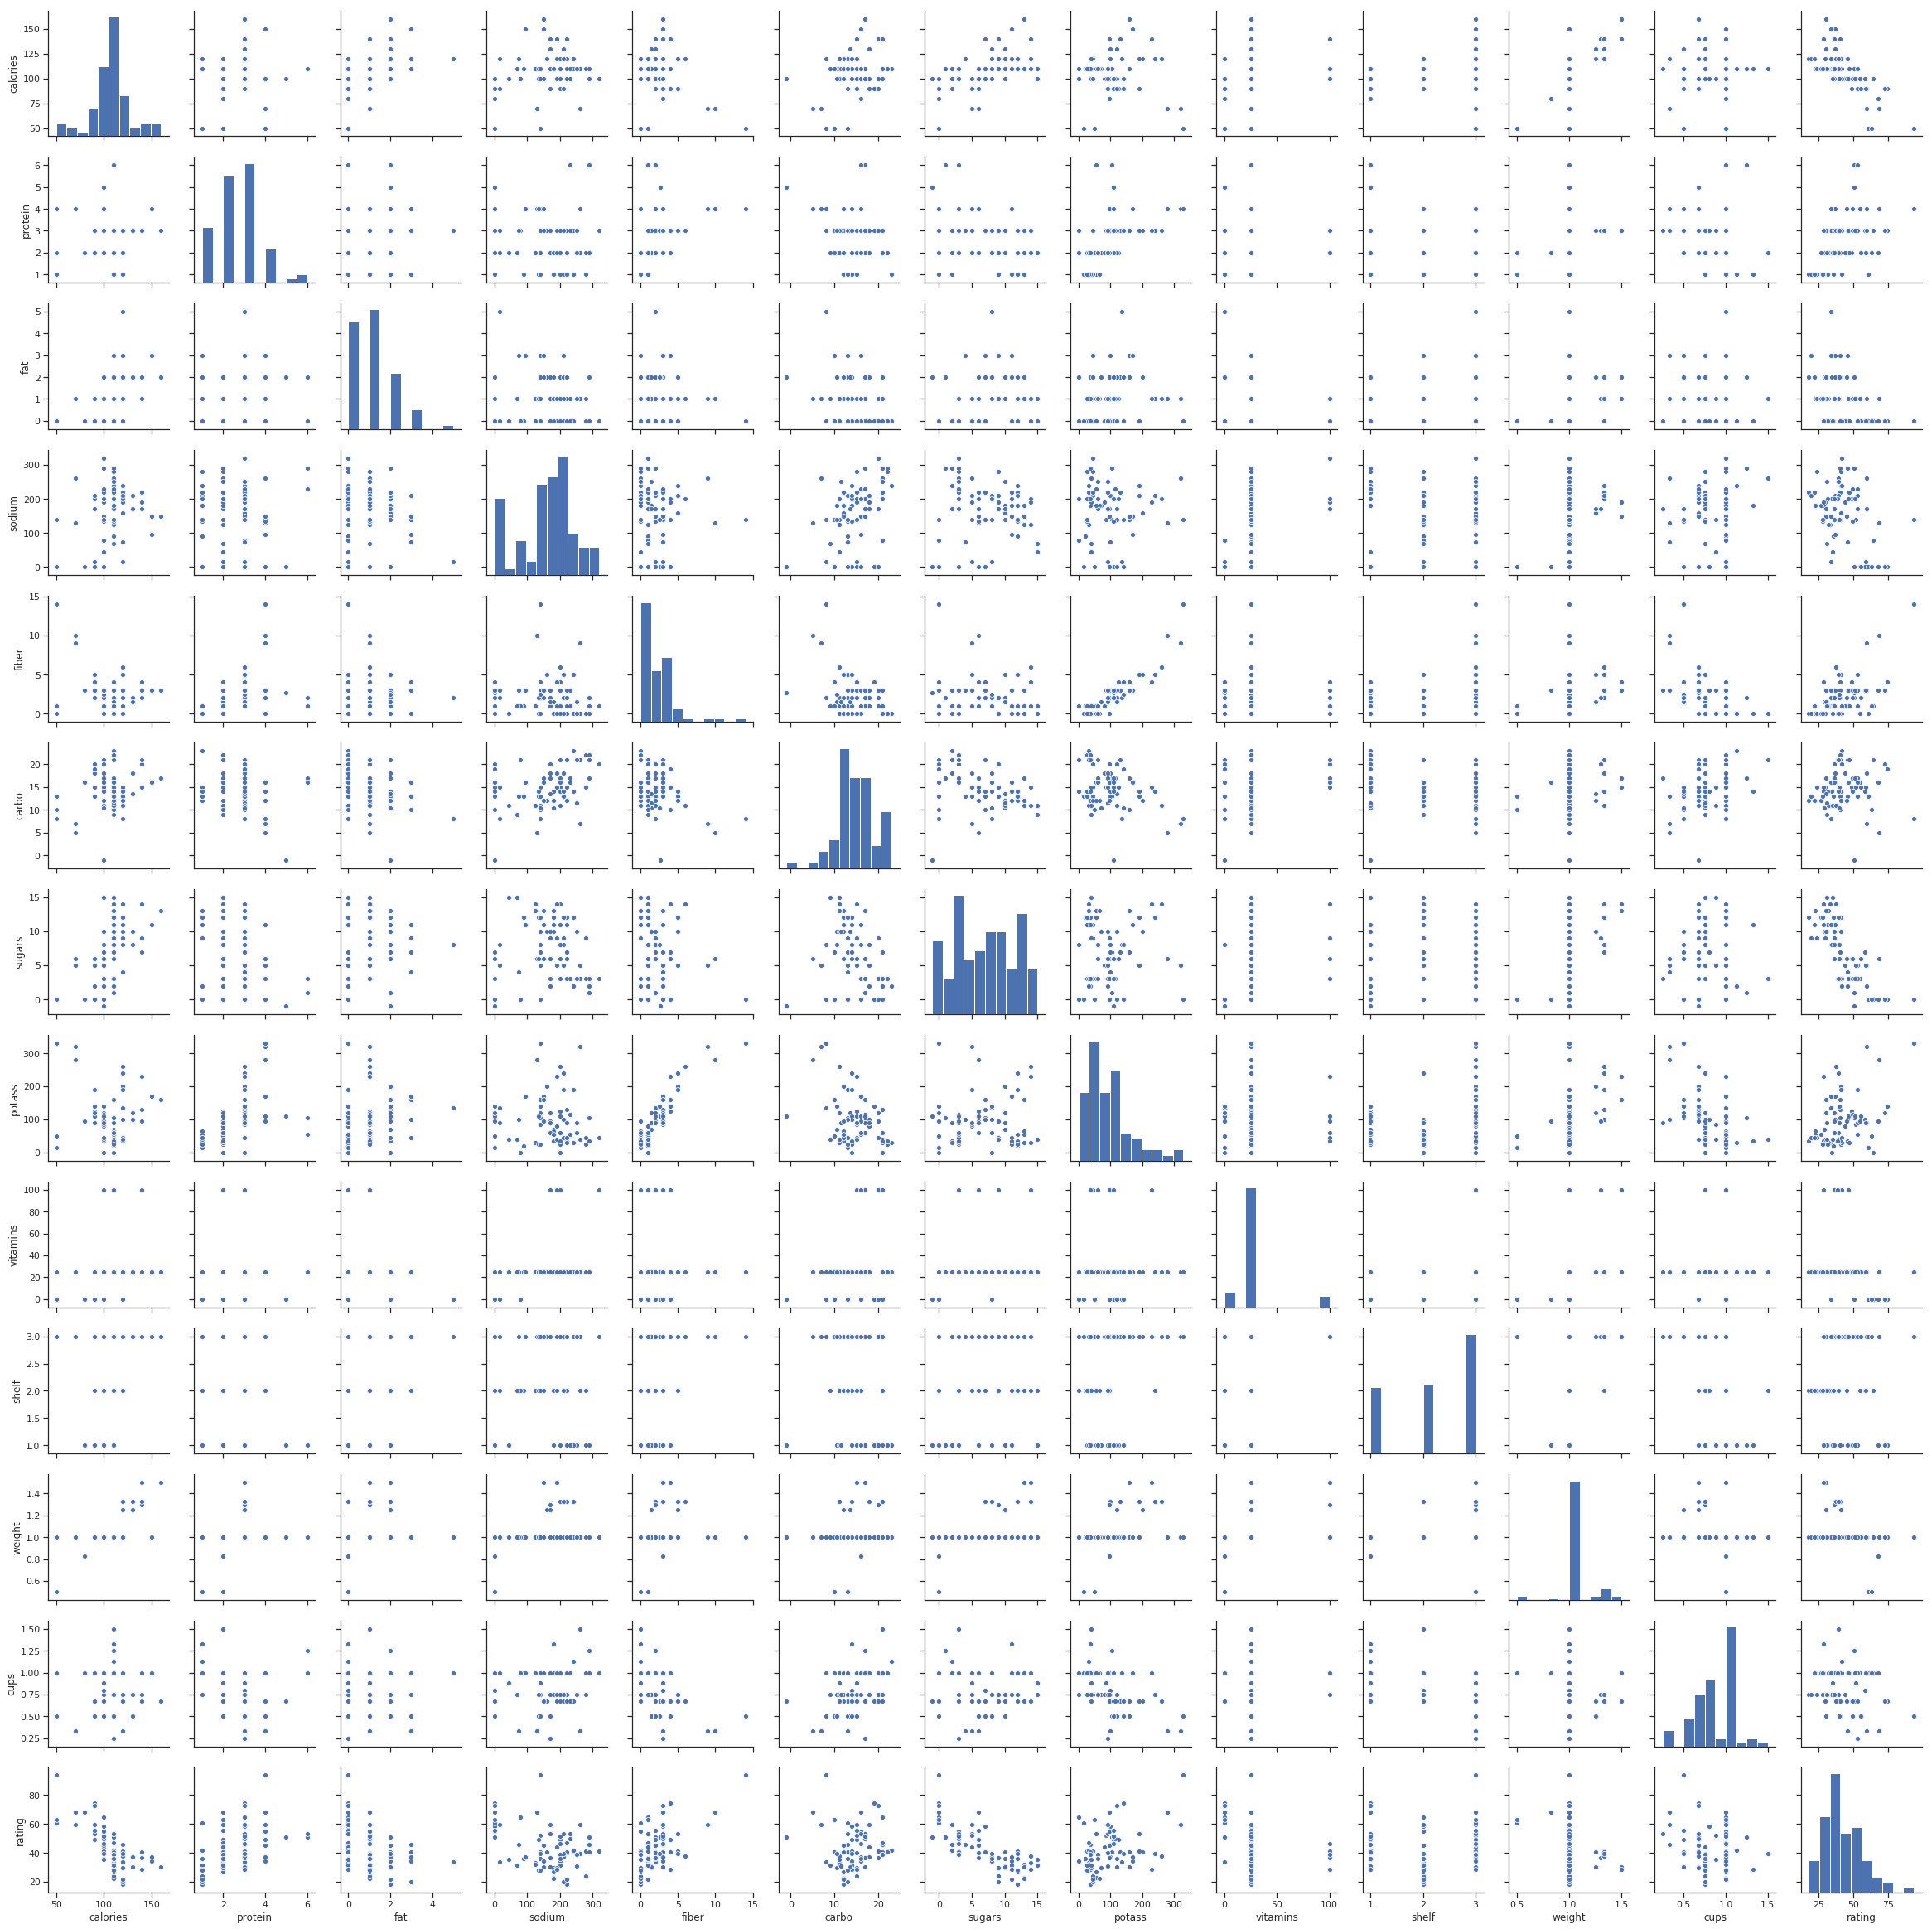

In [0]:
sns.pairplot(cereal)

**Pairplot visualizing the relationships between our three selected predictors and the response**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.03, 'Rating vs. Calories, Fiber, and Sugars')

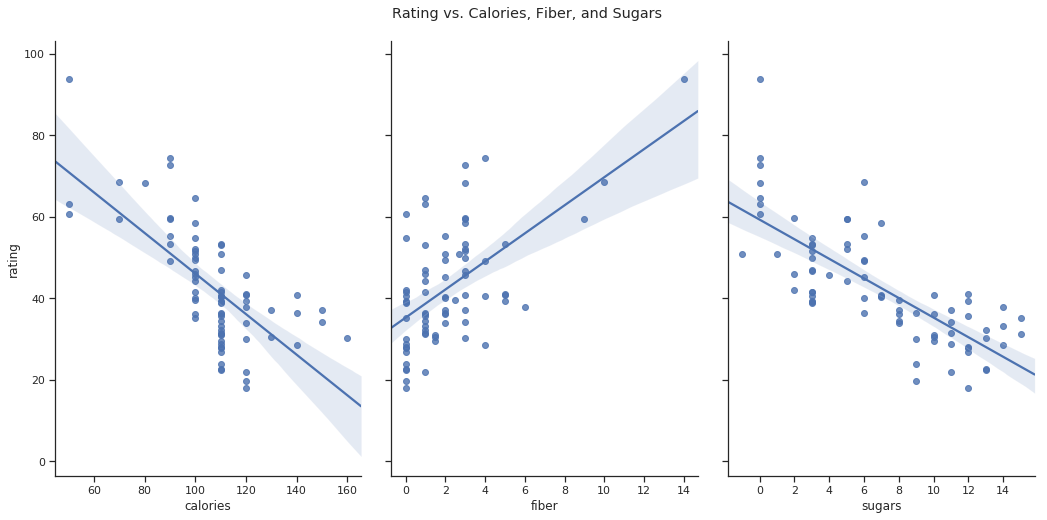

In [0]:
ax_3pair = sns.pairplot(cereal, x_vars=['calories','fiber','sugars'], y_vars='rating', size=7, aspect=0.7, kind='reg')
ax_3pair.fig.suptitle('Rating vs. Calories, Fiber, and Sugars', y=1.03)


In [0]:
ax_3pair.savefig("output.png")

**Calculating R^2 and R^2 Adjusted for Single and Multiple Linear Regressions without Splitting Data** For this tutorial, we at first do not calculate the R^2 and Adjusted R^2 using a train/test split of the data for simplicity's sake. Instead we go ahead and use the whole dataset. Later on, we go back and compare a 3 predictor and 4 predictor model using a train/test split so you can follow along with the process. 

Defining R Squared for Single Linear Regression

In [0]:
import scipy
def rsquared(x, y):
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2

R^2 of model with cups (bad predictor) predicting rating and a model with calories (good predictor) predicting rating. 
As you can see, the model with the better predictor has a better R^2.

In [0]:
 print("R^2 of model with Cup Predictor:",rsquared(cereal['cups'], cereal['rating']))
print("R^2 of model with Calories Predictor:",rsquared(cereal['calories'], cereal['rating']))

R^2 of model with Cup Predictor: 0.0412740112014871
R^2 of model with Calories Predictor: 0.4752393123451636


In [0]:
import scipy
scipy.stats.linregress(cereal['calories'], cereal['rating'])
#rsquared(cereal['calories'], cereal['rating'])

LinregressResult(slope=-0.49701318979564285, intercept=95.78802384439143, rvalue=-0.6893760311652586, pvalue=4.1402774000064275e-12, stderr=0.06030617024600228)

Scatterplot for the relationship between Rating and Calories

Text(0.5, 1.0, 'Rating vs. Calories')

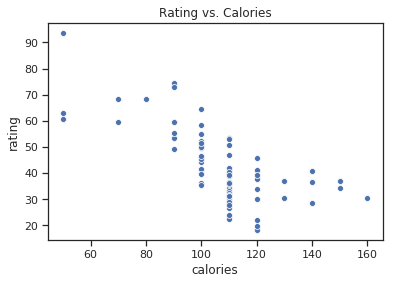

In [0]:
ax_scatter = sns.scatterplot(cereal['calories'], cereal['rating'])
ax_scatter.set_title("Rating vs. Calories")

Residual plot between Calories and Rating

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


Text(0.5, 1.0, 'Rating vs. Calories Residual Plot')

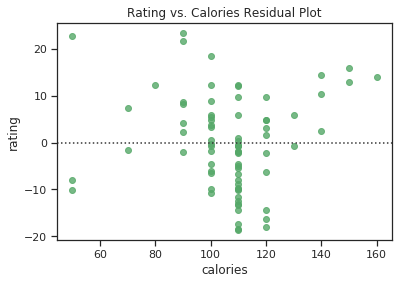

In [0]:
ax_residual = sns.residplot(cereal['calories'], cereal['rating'], color="g")
ax_residual.set_title("Rating vs. Calories Residual Plot")

R^2 and R^2 Adjusted of a 3 predictor model

In [0]:
data =  cereal.iloc[:,[3,7,9,14,15]]

m3 = LinearRegression().fit(data.iloc[:,0:3], data.rating)
mp = m3.predict(data.iloc[:,0:3])
r2prime = r2_score(data.rating, mp)
print("R^2:",r2prime)
print("R^2 Adjusted:",1-(1-r2prime)*(15-1)/(15-3-1))


R^2: 0.8483669504178866
R^2 Adjusted: 0.8070124823500374


R^2 and R^2 Adjusted of a 4 predictor model

In [0]:
m4 = LinearRegression().fit(data.iloc[:,0:4], data.rating)
mp = m4.predict(data.iloc[:,0:4])
r2prime = r2_score(data.rating, mp)
print("R^2:",r2prime)
print("R^2 Adjusted:",1-(1-r2prime)*(15-1)/(15-4-1))

R^2: 0.8490487016343364
R^2 Adjusted: 0.788668182288071


**Calcuating R^2 and R^2 Adjusted for a 3 Predictor Model and  4 Predictor Model WITH Splitting the Data into a Train and Test Set**

Subsetting the dataframe for just our variables of interest

In [0]:
data =  cereal.iloc[:,[3,7,9,14,15]]
data.head()

,calories,fiber,sugars,cups,rating
0,70,10.0,6,0.33,68.402973
1,120,2.0,8,1.00,33.983679
2,70,9.0,5,0.33,59.425505
3,50,14.0,0,0.50,93.704912
4,110,1.0,8,0.75,34.384843


Randomly subsetting a train and test set

In [0]:
rng = np.random.RandomState(740)

msk = rng.rand(len(data)) < 0.8

#This is the train and test set for the model with 4 predictors which we'll use second. 
train2 = data[msk]
test2 = data[~msk]

#This is the train and test set for the model with 3 predictors which we're using right now

train = train2.iloc[:,[0,1,2,4]]
test = test2.iloc[:,[0,1,2,4]]

In [0]:
train.shape

(61, 4)

Separating our 3 predictor model predictors for the rating variable

In [0]:
x_train = train.iloc[:,0:3]
y_train = train.rating
x_test = test.iloc[:,0:3]
y_test = test.rating

Fitting our Linear Regression model to our train data

In [0]:
mlr = LinearRegression()
mlr.fit(x_train,y_train)

print('Coefficients: \n', mlr.coef_)
print('Intercept:', mlr.intercept_)

Coefficients: 
 [-0.17410844  2.6033038  -1.70122256]
Intercept: 67.19928743837096


R^2 for our 3 Predictor Model

In [0]:
mlr_predicted_scores = mlr.predict(x_test)
r2 = r2_score(y_test, mlr_predicted_scores)
print("3 Predictors R^2:",r2)

3 Predictors R^2: 0.806598899707508


Adjusted R^2 for our 3 predictor model

In [0]:
adj_r2 = 1-(1-r2)*(15-1)/(15-3-1)
print("3 Predictors R^2 Adjusted:", adj_r2)

3 Predictors R^2 Adjusted: 0.7538531450822828


Here we're separating our predictors from the rating variable for our 4 predictor model now. Ignore the "bad" in the names.

In [0]:
bad_x_train = train2.iloc[:,0:4]
bad_y_train = train2.rating
bad_x_test = test2.iloc[:,0:4]
bad_y_test = test2.rating

Fitting our Linear Regression model to our train data

In [0]:
bad_mlr = LinearRegression()
bad_mlr.fit(bad_x_train,bad_y_train)

print('Coefficients: \n', bad_mlr.coef_)
print('Intercept:', bad_mlr.intercept_)

Coefficients: 
 [-0.17404314  2.63167513 -1.70030227  0.56834395]
Intercept: 66.66645512135173


R^2 for our 4 predictor model

In [0]:
bad_mlr_predicted_scores = bad_mlr.predict(bad_x_test)
bad_r2 = r2_score(bad_y_test, bad_mlr_predicted_scores)
print("4 Predictors R^2:", bad_r2)

4 Predictors R^2: 0.8090101127701305


Adjusted R^2 for our 4 predictor model

In [0]:
bad_adj_r2 = 1-(1-bad_r2)*(15-1)/(15-3-1)
print("4 Predictors R^2 Adjusted:",bad_adj_r2)

4 Predictors R^2 Adjusted: 0.7569219617074388


Comparing the R^2 and R^2 Adjusted between the 3 and 4 predictor models

In [0]:
print("3 Predictors R^2:",r2)
print("3 Predictors R^2 Adjusted:", adj_r2)
print("4 Predictors R^2:", bad_r2)
print("4 Predictors R^2 Adjusted:",bad_adj_r2)

3 Predictors R^2: 0.806598899707508
3 Predictors R^2 Adjusted: 0.7538531450822828
4 Predictors R^2: 0.8090101127701305
4 Predictors R^2 Adjusted: 0.7569219617074388


**Other Forms of Error using our split 3 predictor model**

MSE - Evaluation metric for regression problems

In [0]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_test, mlr_predicted_scores)
print("MSE:", mse)

MSE: 26.632946231753284


RMSE

In [0]:
from math import sqrt
rmse=sqrt(mse)
print("RMSE:", rmse)

RMSE: 5.160711795067932


MAE - Another evaluation metric for regression

In [0]:

mae = metrics.mean_absolute_error(y_test, mlr_predicted_scores)
print("MAE:", mae)

MAE: 3.615280472733624


MAPE

In [0]:
def mape(y_actual, y_pred): 
    y_actual = np.array(y_actual)
    y_pred = np.array(y_pred)
    return np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100
  
print("MAPE:", mape(y_test, mlr_predicted_scores))

MAPE: 8.457546359530266


**Calculating AIC and BIC for our split 3 and 4 predictor models**

In [0]:
#AIC for model with 3 predictors
resid1 = y_test - mlr_predicted_scores
sse1 = sum(resid1**2)
k1=3+1
N1=len(y_test)

AIC1 = N1 * np.log(sse1/N1) + 2*k1

#AIC for model with 4 predictors
resid2 = bad_y_test - bad_mlr_predicted_scores
sse2 = sum(resid2**2)
k2=4+1
N2=len(bad_y_test)

AIC2 = N2 * np.log(sse2/N2) + 2*k2

print("AIC of Model with 3 Predictors:", AIC1)
print("AIC of Model with 4 Predictors:", AIC2)

AIC of Model with 3 Predictors: 60.51438447233831
AIC of Model with 4 Predictors: 62.31365180026097


In [0]:
#BIC for model with 3 predictors
BIC1 = N1 * np.log(sse1/N1) + k1*np.log(N1)

#BIC for model with 4 predictors
BIC2 = N2 * np.log(sse2/N2) + k2*np.log(N2)

print("BIC of Model with 3 Predictors:", BIC1)
print("BIC of Model with 4 Predictors:", BIC2)

BIC of Model with 3 Predictors: 63.60473936129743
BIC of Model with 4 Predictors: 66.17659541145987


**A High R^2 may not always be accurate**

Example where R^2 is high, but other forms of error are also high

In [0]:
x = [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]
y =[[3], [9], [22], [44], [80], [79], [150], [167], [229], [455]]
example = LinearRegression().fit(x, y)
p = example.predict(x)
rrr = r2_score(y, p)
print("R^2:")
print(rrr)
print("This seems to suggest the model is a good fit but:")
m_ex = metrics.mean_squared_error(y, p) 
print("MSE:",m_ex)

R^2:
0.7802860562471512
This seems to suggest the model is a good fit but:
MSE: 3773.402424242425


In [0]:
# RMSE
from math import sqrt
sqrt(3773.402424242425)

61.42802637430593

In [0]:
# MAE
metrics.mean_absolute_error(y, p)

47.33212121212121

In [0]:
# MAPE
def mape(y_actual, y_pred): 
    y_actual = np.array(y_actual)
    y_pred = np.array(y_pred)
    return np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100
  
mape(y, p)

257.6948038674606